In [2]:
import numpy as np
import networkx as nx
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim

import entropy_estimators as ee

In [ ]:
from func.EI_calculation import tpm_ei
from func.p_calculation import calculate_or_p
from func.p_calculation import calculate_xor_p
from func.p_calculation import noise_modify_p

In [3]:
%run EI_calculation.ipynb

In [4]:
%run p_calculation.ipynb

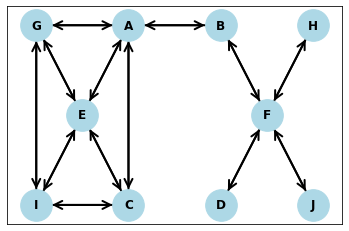

In [5]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
G.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'E'), ('C', 'E'), ('E', 'C'), ('F', 'D'), 
                  ('H', 'F'), ('D', 'F'), ('F', 'D'), ('B', 'F'), ('E', 'A'), ('F', 'B'), ('F', 'H'), ('G', 'I'), 
                  ('A', 'G'), ('I', 'G'), ('I', 'C'), ('E', 'G'), ('E', 'I'), ('E', 'A'), ('J', 'F'), ('F', 'J'), 
                  ('C', 'I'), ('G', 'A'), ('G', 'E'), ('I', 'E')])
pos = {'A': (2, 2), 'B': (4, 2), 'C': (2, 0), 'D': (4, 0), 'E': (1, 1), 'F': (5, 1), 
       'I': (0, 0), 'G': (0, 2), 'H': (6, 2), 'J': (6, 0)}
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True, 
                 labels={node: node for node in G.nodes()}, node_size=1000, width=2, arrowstyle='->', arrowsize=20)
plt.show()

# ACEGI或——BDFHJ或

## 整体

In [31]:
Col = ['{:010b}'.format(i) for i in range(1024)]
ABCDEFGHIJ = np.empty((1024, 1024))

for i in range(ABCDEFGHIJ.shape[0]):
    
    pa = calculate_or_p(i, 1,2,4,6) 
    pc = calculate_or_p(i, 0,4,8)
    pe = calculate_or_p(i, 0,2,6,8)
    pg = calculate_or_p(i, 0,4,8)
    pi = calculate_or_p(i, 2,4,6)
    
    pb = calculate_or_p(i, 0,5)
    pd = calculate_or_p(i, 5)
    pf = calculate_or_p(i, 1,3,7,9)
    ph = calculate_or_p(i, 5)
    pj = calculate_or_p(i, 5)
        
    pg_ph_pi_pj = np.kron(pg, np.kron(ph, np.kron(pi, pj)))
    ABCDEFGHIJ[i] = np.kron(pa, np.kron(pb, np.kron(pc, np.kron(pd, np.kron(pe, np.kron(pf, pg_ph_pi_pj))))))

In [32]:
ABCDEFGHIJ_ei = tpm_ei(ABCDEFGHIJ, log_base = 2)
ABCDEFGHIJ_ei

3.1286951425292644

## ACEGI

In [17]:
Col = ['{:05b}0'.format(i) for i in range(32)]
ACEGI_B_0 = np.empty((32, 32))

for i in range(ACEGI_B_0.shape[0]):  
    
    pa = calculate_or_p(i, 1,2,3,5) 
    pc = calculate_or_p(i, 0,2,4)
    pe = calculate_or_p(i, 0,1,3,4)
    pg = calculate_or_p(i, 0,2,4)
    pi = calculate_or_p(i, 1,2,3)

    ACEGI_B_0[i] = np.kron(pa, np.kron(pc, np.kron(pe, np.kron(pg, pi))))

In [18]:
Col = ['{:05b}1'.format(i) for i in range(32)]
ACEGI_B_1 = np.empty((32, 32))

for i in range(ACEGI_B_1.shape[0]):  
    
    pa = calculate_or_p(i, 1,2,3,5) 
    pc = calculate_or_p(i, 0,2,4)
    pe = calculate_or_p(i, 0,1,3,4)
    pg = calculate_or_p(i, 0,2,4)
    pi = calculate_or_p(i, 1,2,3)

    ACEGI_B_1[i] = np.kron(pa, np.kron(pc, np.kron(pe, np.kron(pg, pi))))

In [19]:
print(tpm_ei(ACEGI_B_0, log_base = 2))  #同质、B为0的时候ACE的ei
print(tpm_ei(ACEGI_B_1, log_base = 2))  #同质、B为1的时候ACE的ei
print((tpm_ei(ACEGI_B_0, log_base = 2) + tpm_ei(ACEGI_B_1, log_base = 2)) / 2)   #异质、ACEGI的ei

1.264097655573916
1.264097655573916
1.264097655573916


## BDFHJ

In [28]:
Col = ['{:05b}0'.format(i) for i in range(32)]
BDFHJ_A_0 = np.empty((32, 32))

for i in range(BDFHJ_A_0.shape[0]):  
    
    pb = calculate_or_p(i, 2,5)
    pd = calculate_or_p(i, 2)
    pf = calculate_or_p(i, 0,1,3,4)
    ph = calculate_or_p(i, 2)
    pj = calculate_or_p(i, 2)

    BDFHJ_A_0[i] = np.kron(pb, np.kron(pd, np.kron(pf, np.kron(ph, pj))))

In [29]:
Col = ['{:05b}1'.format(i) for i in range(32)]
BDFHJ_A_1 = np.empty((32, 32))

for i in range(BDFHJ_A_1.shape[0]):  
    
    pb = calculate_or_p(i, 2,5)
    pd = calculate_or_p(i, 2)
    pf = calculate_or_p(i, 0,1,3,4)
    ph = calculate_or_p(i, 2)
    pj = calculate_or_p(i, 2)

    BDFHJ_A_1[i] = np.kron(pb, np.kron(pd, np.kron(pf, np.kron(ph, pj))))

In [30]:
print(tpm_ei(BDFHJ_A_0, log_base = 2))  #同质、A为0的时候BDF的ei
print(tpm_ei(BDFHJ_A_1, log_base = 2))  #同质、A为1的时候BDF的ei
print((tpm_ei(BDFHJ_A_0, log_base = 2) + tpm_ei(BDFHJ_A_1, log_base = 2)) / 2)  #异质、BDF的ei

1.337290066617014
1.337290066617014
1.337290066617014


# ACEGI异或——BDFHJ异或

## 整体

In [33]:
Col = ['{:010b}'.format(i) for i in range(1024)]
ABCDEFGHIJ = np.empty((1024, 1024))

for i in range(ABCDEFGHIJ.shape[0]):
    
    pa = calculate_xor_p(i, 1,2,4,6) 
    pc = calculate_xor_p(i, 0,4,8)
    pe = calculate_xor_p(i, 0,2,6,8)
    pg = calculate_xor_p(i, 0,4,8)
    pi = calculate_xor_p(i, 2,4,6)
    
    pb = calculate_xor_p(i, 0,5)
    pd = calculate_xor_p(i, 5)
    pf = calculate_xor_p(i, 1,3,7,9)
    ph = calculate_xor_p(i, 5)
    pj = calculate_xor_p(i, 5)
    
    pg_ph_pi_pj = np.kron(pg, np.kron(ph, np.kron(pi, pj)))
    ABCDEFGHIJ[i] = np.kron(pa, np.kron(pb, np.kron(pc, np.kron(pd, np.kron(pe, np.kron(pf, pg_ph_pi_pj))))))

In [34]:
print(tpm_ei(ABCDEFGHIJ, log_base = 2))

6.0


## ACEGI

In [35]:
Col = ['{:05b}0'.format(i) for i in range(32)]
ACEGI_B_0 = np.empty((32, 32))

for i in range(ACEGI_B_0.shape[0]):  
    
    pa = calculate_xor_p(i, 1,2,3,5) 
    pc = calculate_xor_p(i, 0,2,4)
    pe = calculate_xor_p(i, 0,1,3,4)
    pg = calculate_xor_p(i, 0,2,4)
    pi = calculate_xor_p(i, 1,2,3)
        
    ACEGI_B_0[i] = np.kron(pa, np.kron(pc, np.kron(pe, np.kron(pg, pi))))

In [36]:
Col = ['{:05b}1'.format(i) for i in range(32)]
ACEGI_B_1 = np.empty((32, 32))

for i in range(ACEGI_B_1.shape[0]):  
    
    pa = calculate_xor_p(i, 1,2,3,5) 
    pc = calculate_xor_p(i, 0,2,4)
    pe = calculate_xor_p(i, 0,1,3,4)
    pg = calculate_xor_p(i, 0,2,4)
    pi = calculate_xor_p(i, 1,2,3)
        
    ACEGI_B_1[i] = np.kron(pa, np.kron(pc, np.kron(pe, np.kron(pg, pi))))

In [37]:
print(tpm_ei(ACEGI_B_0, log_base = 2))  #同质、B为0的时候ACE的ei
print(tpm_ei(ACEGI_B_1, log_base = 2))  #同质、B为1的时候ACE的ei
print((tpm_ei(ACEGI_B_0, log_base = 2) + tpm_ei(ACEGI_B_1, log_base = 2)) / 2)   #异质、ACEGI的ei

2.0
2.0
2.0


## BDFHJ

In [38]:
Col = ['{:05b}0'.format(i) for i in range(32)]
BDFHJ_A_0 = np.empty((32, 32))

for i in range(BDFHJ_A_0.shape[0]):  
    
    pb = calculate_xor_p(i, 2,5)
    pd = calculate_xor_p(i, 2)
    pf = calculate_xor_p(i, 0,1,3,4)
    ph = calculate_xor_p(i, 2)
    pj = calculate_xor_p(i, 2)

    BDFHJ_A_0[i] = np.kron(pb, np.kron(pd, np.kron(pf, np.kron(ph, pj))))

In [39]:
Col = ['{:05b}1'.format(i) for i in range(32)]
BDFHJ_A_1 = np.empty((32, 32))

for i in range(BDFHJ_A_1.shape[0]):  
    
    pb = calculate_xor_p(i, 2,5)
    pd = calculate_xor_p(i, 2)
    pf = calculate_xor_p(i, 0,1,3,4)
    ph = calculate_xor_p(i, 2)
    pj = calculate_xor_p(i, 2)

    BDFHJ_A_1[i] = np.kron(pb, np.kron(pd, np.kron(pf, np.kron(ph, pj))))

In [40]:
print(tpm_ei(BDFHJ_A_0, log_base = 2))  #同质、A为0的时候BDF的ei
print(tpm_ei(BDFHJ_A_1, log_base = 2))  #同质、A为0的时候BDF的ei
print((tpm_ei(BDFHJ_A_0, log_base = 2) + tpm_ei(BDFHJ_A_1, log_base = 2)) / 2)  #异质、BDF的ei

2.0
2.0
2.0
